# Tarea 3 - Miguel Rios Tangarife

In [1]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
desire_size = (50, 50)
n_channels = 3
batch_size = 128
labels = list(map(lambda x: x.split("\\")[1], glob.glob("data/train/*/*.png")))
IDS = list(map(lambda x: x.split("\\")[2], glob.glob("data/train/*/*.png")))
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
num_out = len(le.classes_)
pd.Series(labels).value_counts()

Loose Silky-bent             620
Common Chickweed             566
Scentless Mayweed            480
Small-flowered Cranesbill    480
Fat Hen                      432
Sugar beet                   361
Charlock                     355
Cleavers                     263
Black-grass                  246
Shepherd’s Purse             233
Maize                        216
Name: count, dtype: int64

Tiene 3 colores (936, 1040, 4)


ValueError: Could not save to JPEG for display

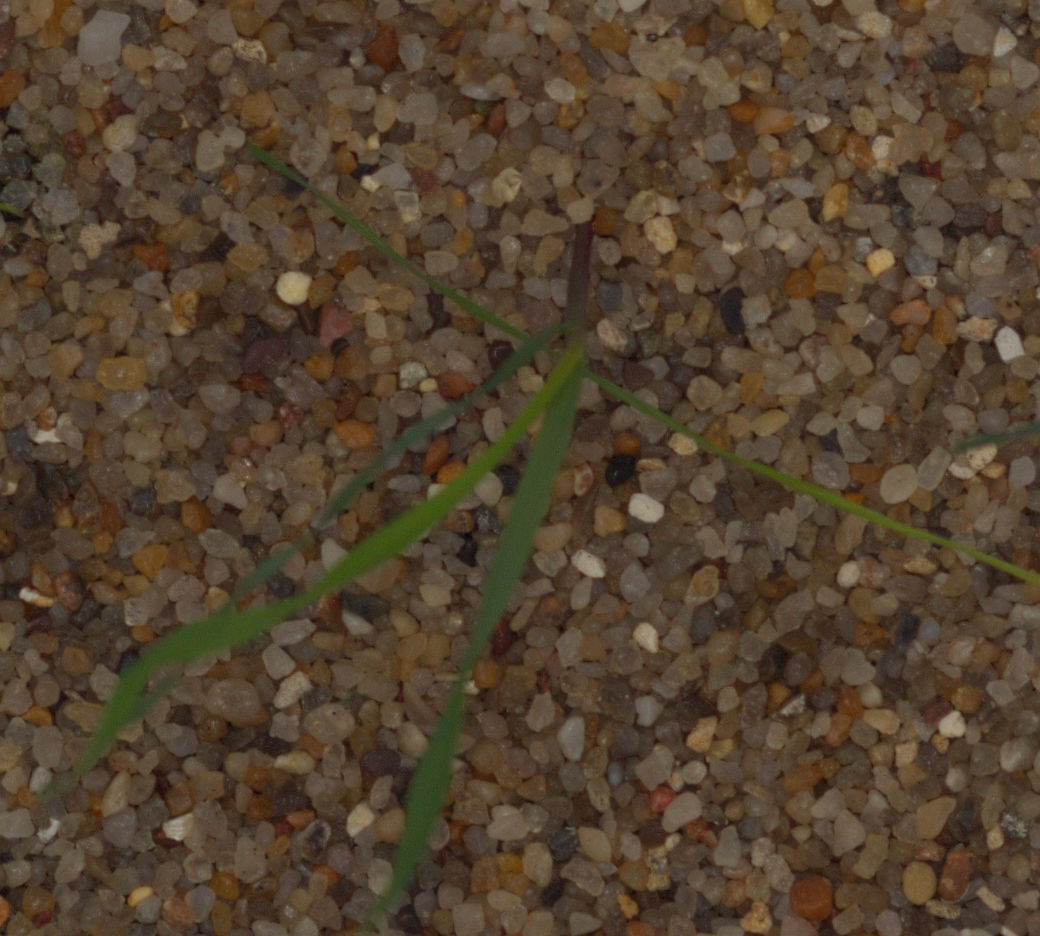

In [17]:
img_color = Image.open(glob.glob(f"data/train/*/{IDS[0]}")[0])
print(f"Tiene 3 colores {np.array(img_color).shape}")
img_color

Tiene 1 canal (936, 1040)


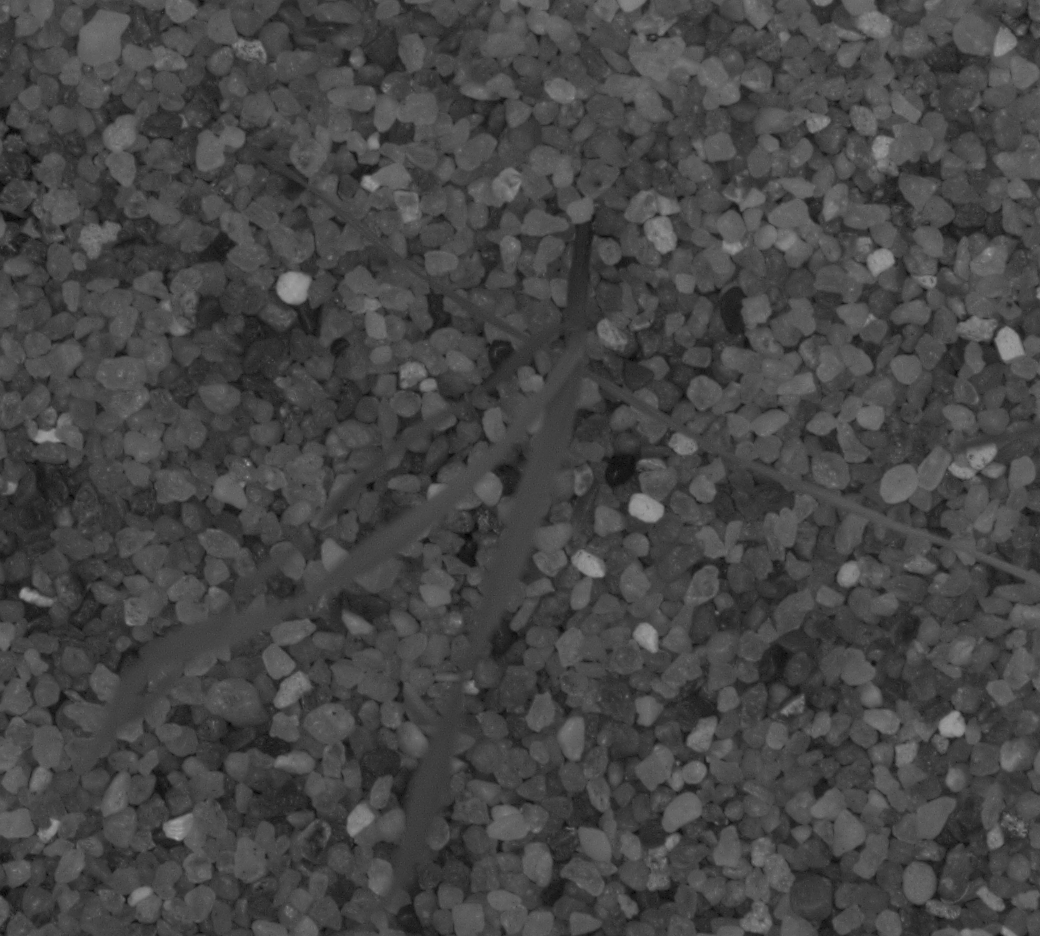

In [4]:
img_color = Image.open(glob.glob(f"data/train/*/{IDS[0]}")[0])
img_gris = img_color.convert('L')
print(f"Tiene 1 canal {np.array(img_gris).shape}")
img_gris

In [5]:
def plot_1_images(d,label, ax=None):
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(d)
    ax.set_title(label=label)
    return fig,ax

In [6]:
#labels = list(map(lambda x: x.split("\\")[1], glob.glob("data/train/*/*.png")))
#IDS = list(map(lambda x: x.split("\\")[2], glob.glob("data/train/*/*.png")))

ls_size = []
X = []
y = []
for file in glob.glob("data/train/*/*"):
    label = file.split("\\")[1]
    id_img = file.split("\\")[2]
    # gray scale para tener los 3 colores quite la L
    im = Image.open(file).convert('L') 
    ls_size.append([im.size[0],im.size[1],label,id_img])
    img_resize = im.resize(desire_size)
    X.append(np.array(img_resize).flatten())
    y.append(label)

In [7]:
np.array(X).shape

(4252, 2500)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Sugar beet'}>)

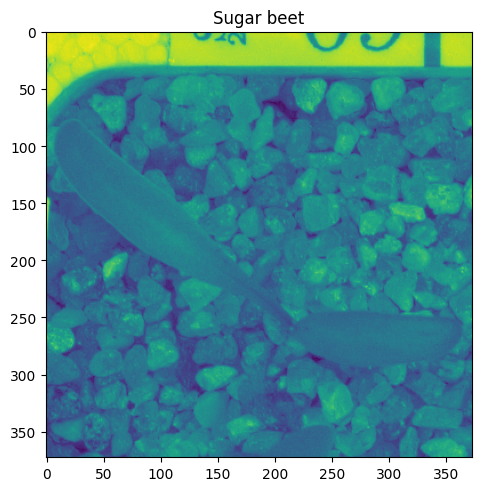

In [8]:
plot_1_images(im,label, ax=None)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Sugar beet'}>)

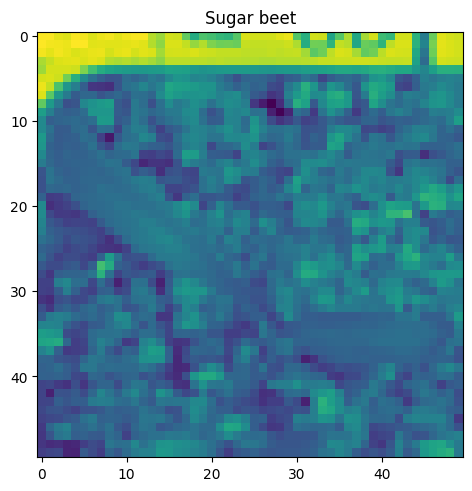

In [9]:
plot_1_images(img_resize,label, ax=None)

In [10]:
# datos ready for CNN
y_img = to_categorical(le.transform(y), dtype ="uint8")
X_img = np.reshape(np.array(X), (-1, desire_size[0], desire_size[1]))
X_train,X_test, y_train,y_test = train_test_split(X_img,y_img,test_size=0.2)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': "['Black-grass']"}>)

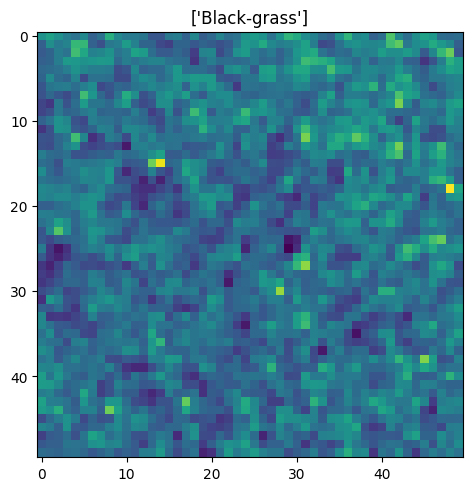

In [11]:
plot_1_images(X_img[0],le.inverse_transform([np.argmax(y_train[0])]), ax=None)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': "['Fat Hen']"}>)

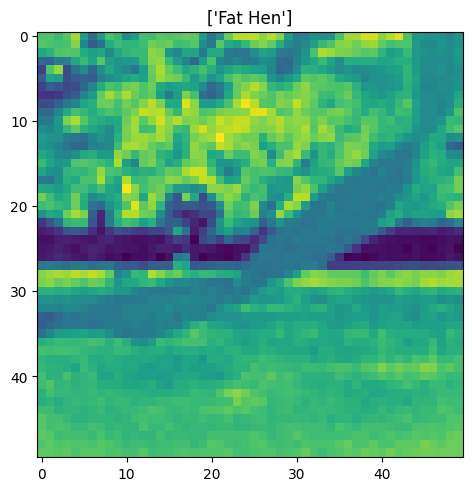

In [12]:
plot_1_images(X_img[1],le.inverse_transform([np.argmax(y_train[1])]), ax=None)

# Regresion logistica

In [17]:
# set a base line
X_train_lg = np.reshape(X_train, (-1, desire_size[0]*desire_size[1]))*1/255
X_test_lg = np.reshape(X_test, (-1, desire_size[0]*desire_size[1]))*1/255
y_train_lg = np.argmax(y_train,axis=1)
y_test_lg = np.argmax(y_test,axis=1)
clf = LogisticRegression(random_state=0,
            solver='lbfgs', max_iter=5000,
            penalty='l2', C=0.1)
clf.fit(X_train_lg, y_train_lg)

LogisticRegression(C=0.1, max_iter=5000, random_state=0)

<Axes: >

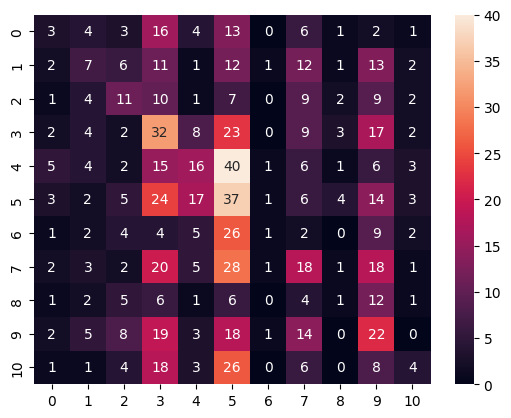

In [18]:
cm = confusion_matrix(y_test_lg, clf.predict(X_test_lg))
sns.heatmap(cm, annot=True, fmt='g')

In [19]:
accuracy_score(y_test_lg, clf.predict(X_test_lg))

0.17861339600470036

In [33]:
X_oob = []
file_oob = []
for file in glob.glob("data/test/*"):
    im = Image.open(file).convert('L')
    img_resize = im.resize(desire_size)
    X_oob.append(np.array(img_resize).flatten())
    file_oob.append(file.split("\\")[1])

In [38]:
X_sub_lg = np.reshape(X_oob, (-1, desire_size[0]*desire_size[1]))*1/255
df_oob = pd.DataFrame(data=zip(file_oob, le.inverse_transform(clf.predict(X_sub_lg))),
                      columns=["file", "species"])
df_oob.head(10)

,file,species
0,001ef70434f6a3eb5eed71ed727f0aee.png,Sugar beet
1,0050ee5befb8db3ec3dc387a20f6f99a.png,Cleavers
2,005f95c7a80d7a24808de84f0a647d9b.png,Cleavers
3,00baa54ef1cdbf1e08ae9759314a9276.png,Loose Silky-bent
4,01357f3d88be239cfdf583bc4b949c54.png,Scentless Mayweed
5,014e30a0846df50bad4415368ffb565f.png,Common Chickweed
6,017bd5eab8e5d029aacf3b63b7bd0882.png,Common Chickweed
7,01a1f3977aaa5f7bf2d48a6059ac56f6.png,Small-flowered Cranesbill
8,01ca14e1494a04ec81c557a0e2c942ef.png,Sugar beet
9,01f9ffc219cc466e8eddc52b354358df.png,Fat Hen


In [23]:
df_oob.to_csv("data/oob_pred.csv", index=False)

In [24]:
# release memory
X_train_lg = X_test_lg = y_train_lg = y_test_lg = None

## CNN 

In [13]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=10, input_shape=(desire_size[0],desire_size[1],1),
                 kernel_size=(4,4),padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(200, activation='relu'))

# Add Dropout
model.add(Dropout(0.1))

# 2nd Fully Connected Layer
model.add(Dense(100, activation='relu'))

# Add Dropout
model.add(Dropout(0.1))

# 3rd Fully Connected Layer
model.add(Dense(50, activation='relu'))

# Add Dropout
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(num_out, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 10)        170       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1456      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        2080      
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        8

In [14]:
model.fit(X_train,y_train,  epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
54/54 [==============================] - 5s 68ms/step - loss: 2.4152 - accuracy: 0.1388 - val_loss: 2.3195 - val_accuracy: 0.1434
Epoch 2/10
54/54 [==============================] - 4s 66ms/step - loss: 2.3066 - accuracy: 0.1700 - val_loss: 2.2426 - val_accuracy: 0.2056
Epoch 3/10
54/54 [==============================] - 4s 66ms/step - loss: 2.1945 - accuracy: 0.2161 - val_loss: 2.1263 - val_accuracy: 0.2268
Epoch 4/10
54/54 [==============================] - 4s 65ms/step - loss: 2.0480 - accuracy: 0.2749 - val_loss: 1.9922 - val_accuracy: 0.3090
Epoch 5/10
54/54 [==============================] - 4s 70ms/step - loss: 1.8368 - accuracy: 0.3405 - val_loss: 1.7066 - val_accuracy: 0.3960
Epoch 6/10
54/54 [==============================] - 4s 67ms/step - loss: 1.7484 - accuracy: 0.3725 - val_loss: 1.6794 - val_accuracy: 0.4407
Epoch 7/10
54/54 [==============================] - 4s 67ms/step - loss: 1.5254 - accuracy: 0.4646 - val_loss: 1.5590 - val_accuracy: 0.4653
Epoch 8/10
54

### Archivo para submit

In [15]:
X_oob = []
file_oob = []
for file in glob.glob("data/test/*"):
    im = Image.open(file).convert('L')
    img_resize = im.resize(desire_size)
    X_oob.append(np.array(img_resize).flatten())
    file_oob.append(file.split("\\")[1])

In [16]:
#oob = Out Of Bag
X_oob_img = np.reshape(np.array(X_oob), (-1, desire_size[0], desire_size[1]))
y_hat = le.inverse_transform(np.argmax(model.predict(X_oob_img), axis=1))
df_oob = pd.DataFrame(data= zip(file_oob, y_hat),
                        columns=["file","species"])
df_oob.to_csv("data/prediction_cnn.csv", index=False)

33/33 [==============================] - 0s 7ms/step
